In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

In [3]:
rows=[]
with open('book1.csv','r') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
       rows.append([float(x) for x in row]) 

In [4]:
wn = range(-10600,-3999,2)
print(len(rows[0]))
print (len(wn))

3301
3301


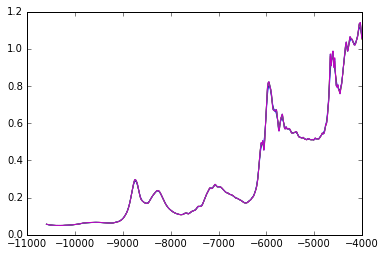

In [5]:
%matplotlib inline

for row in rows:
    plt.plot(wn,row)
plt.show()

In [6]:
def makeLorentzianFilter(resolution,fwhm):
    f = []
    for idx in  range( (int)(2*fwhm/resolution)):
        x= 2*resolution *idx / fwhm
        f.append(1.0/(1.0+(x*x)))
    result =  list(reversed(f))[:-1]
    result.extend(f)
    result = np.divide(result,np.sum(result))
    return result

In [17]:
def makeBoxFilter(resolution,fwhm):
    return [1.0 / fwhm for x in range(fwhm)]

f = makeBoxFilter (2, 10)
print (np.sum(f))

1.0


In [ ]:
def makeTriangleFilter(resolution,fwhm):
    

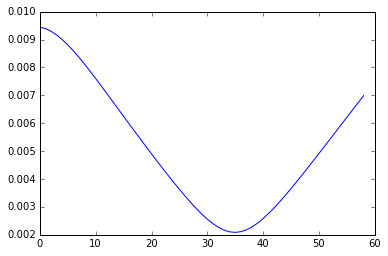

In [33]:
test = rows[4]
target = rows[0]
std = []

for bw in range(1,60):
    f = makeFilter(2,bw)
    conv = np.convolve(test,f,'same')
    diff = np.subtract(conv,target)
    std.append(np.std(diff[200:-200]))
#    plt.plot(wn[3000:-200],diff[3000:-200])
#    plt.ylim((-0.03,0.04))
#    plt.show()
plt.plot(std)


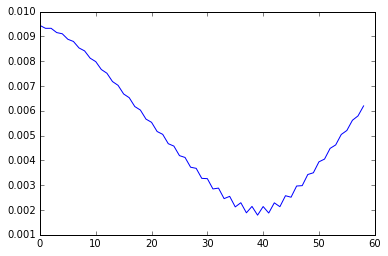

In [28]:
test = rows[4]
target = rows[0]
std = []

for bw in range(1,60):
    f = makeBoxFilter(2,bw)
    conv = np.convolve(test,f,'same')
    diff = np.subtract(conv,target)
    std.append(np.std(diff[200:-200]))
#    plt.plot(wn[3000:-200],diff[3000:-200])
#    plt.ylim((-0.03,0.04))
#    plt.show()
plt.plot(std)